# Library Usage in Seattle, 2005-2020

## Exploratory Data Analysis

The data that is the basis for this project is the [Checkouts by Title (Physical Items)](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff) dataset from [Seattle Open Data](https://data.seattle.gov/). It was downloaded on December 15, 2020.

This notebook uses two datasets that were created in the [previous notebook](01_data_cleaning.ipynb), which I use to explore and analyze the types of items and the quantities of those items that were checked out from the Seattle Library system between 2005 and 2020.

## Table of contents

1. [Import required packages](#Import-required-packages)
2. [Load data](#Load-data)

### Import required packages

In [1]:
# standard dataframe packages
import pandas as pd
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

# custom functions
from functions.data_cleaning import *

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

### Load data

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

I'll load both the complete item checkouts data, as well as the item counts data, here. Again, these were created in the [previous notebook](01_data_cleaning.ipynb).

#### ⏰ Cell below takes 20-25 minutes to run. ⏰

In [2]:
%%time

# uncomment to load complete item checkouts data
df_full = load_multi_df(
    'data/', 'seattle_lib_', 'pkl', 11, compression='gzip', verbose=1
)

Current time = 21:46:40
-----------------------
Begin load...

Current time = 22:10:26
-----------------------
Load complete!

CPU times: user 3min 39s, sys: 10min 30s, total: 14min 10s
Wall time: 23min 52s


In [3]:
# take a look
df_full.head()

,title,subjects,date,format_group,format_subgroup,category_group,age_group
0,Firewall,"Kidnapping Drama, Video recordings for the hea...",2008-02-13,Media,Video Disc,Fiction,Adult
1,Marley me,"Comedy films, Married people Drama, Philadelph...",2009-07-03,Media,Video Disc,Fiction,Adult
2,Six feet under The complete fourth season,"Video recordings for the hearing impaired, Pro...",2008-10-26,Media,Video Disc,Fiction,Adult
3,Doctor Who The next doctor,"London England Drama, Doctor Who Fictitious ch...",2010-11-10,Media,Video Disc,Fiction,Adult
4,School ties,"Antisemitism Drama, Video recordings for the h...",2008-12-28,Media,Video Disc,Fiction,Adult


In [4]:
# uncomment to load item counts data
df_counts = pd.read_pickle('data/seattle_lib_counts.pkl', compression='gzip')

In [5]:
# take a look
df_counts.head()

,total_checkouts,missing_title,missing_subjects,format_group_Equipment,format_group_Media,format_group_Other,format_group_Print,format_subgroup_Art,format_subgroup_Audio Disc,format_subgroup_Audio Tape,...,format_subgroup_Video Tape,category_group_Fiction,category_group_Interlibrary Loan,category_group_Language,category_group_Nonfiction,category_group_Other,category_group_Reference,age_group_Adult,age_group_Juvenile,age_group_Teen
date,,,,,,,,,,,,,,,,,,,,,
2005-04-13,16471,212,664,1.0,6397.0,32.0,10041.0,0.0,1874.0,63.0,...,1878.0,8189.0,32.0,370.0,6719.0,1143.0,18.0,11257.0,4613.0,601.0
2005-04-14,10358,123,541,1.0,4015.0,75.0,6267.0,0.0,1245.0,31.0,...,1115.0,5276.0,73.0,272.0,4104.0,621.0,12.0,6726.0,3381.0,251.0
2005-04-15,12896,179,508,0.0,5351.0,51.0,7494.0,0.0,1462.0,54.0,...,1721.0,6357.0,50.0,302.0,5166.0,1014.0,7.0,8795.0,3747.0,354.0
2005-04-16,1358,7,56,0.0,552.0,0.0,806.0,0.0,175.0,8.0,...,163.0,567.0,0.0,29.0,666.0,95.0,1.0,950.0,367.0,41.0
2005-04-17,4555,80,232,0.0,1555.0,8.0,2992.0,0.0,499.0,10.0,...,480.0,2017.0,8.0,177.0,2145.0,203.0,5.0,3035.0,1349.0,171.0


In [6]:
df_full[df_full.format_group == 'Equipment'].head(10)

,title,subjects,date,format_group,format_subgroup,category_group,age_group
19752051,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-09-01,Equipment,Kit,Nonfiction,Adult
19752202,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-15,Equipment,Kit,Nonfiction,Adult
19752518,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-09,Equipment,Kit,Nonfiction,Adult
19752679,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-22,Equipment,Kit,Nonfiction,Adult
19752807,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-11-23,Equipment,Kit,Nonfiction,Adult
19752884,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-12-09,Equipment,Kit,Nonfiction,Adult
19753114,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-10-28,Equipment,Kit,Nonfiction,Adult
19753541,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-12,Equipment,Kit,Nonfiction,Adult
19753614,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-07-17,Equipment,Kit,Nonfiction,Adult
19753933,SPL HotSpot connecting Seattle,"Wireless LANs, Wireless Internet, Wireless com...",2015-08-29,Equipment,Kit,Nonfiction,Adult


### Analysis of `format_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [7]:
# raw counts
col_counts = df_full.format_group.value_counts()
col_counts

Print        59615970
Media        46618209
Other          200453
Equipment       69211
Name: format_group, dtype: int64

In [50]:
# as a percentage of the data
df_full.format_group.value_counts(normalize=True) * 100

Print        55.975417
Media        43.771387
Other         0.188212
Equipment     0.064985
Name: format_group, dtype: float64

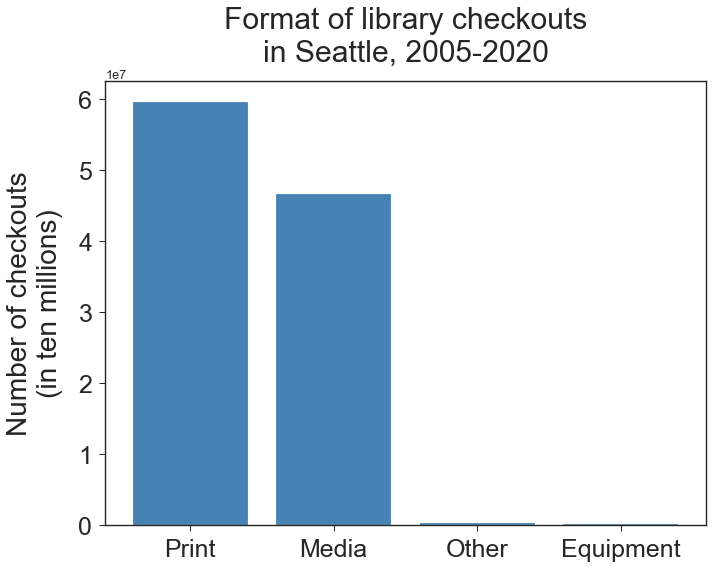

In [8]:
# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `format_subgroup`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [47]:
# raw counts
col_counts = df_full.format_subgroup.value_counts()
col_counts

Book              59417481
Video Disc        30287406
Audio Disc        11238813
Audiobook Disc     2695078
Video Tape         1474457
Kit                 695201
Audiobook Tape      240328
Music Score         130486
Audio Tape           45946
Folder               23900
Data Disc             9886
Periodical             623
Document               471
Art                    129
Film                    81
Name: format_subgroup, dtype: int64

In [49]:
# as a percentage of the data
df_full.format_subgroup.value_counts(normalize=True) * 100

Book              55.916922
Video Disc        28.503035
Audio Disc        10.576682
Audiobook Disc     2.536298
Video Tape         1.387590
Kit                0.654243
Audiobook Tape     0.226169
Music Score        0.122798
Audio Tape         0.043239
Folder             0.022492
Data Disc          0.009304
Periodical         0.000586
Document           0.000443
Art                0.000121
Film               0.000076
Name: format_subgroup, dtype: float64

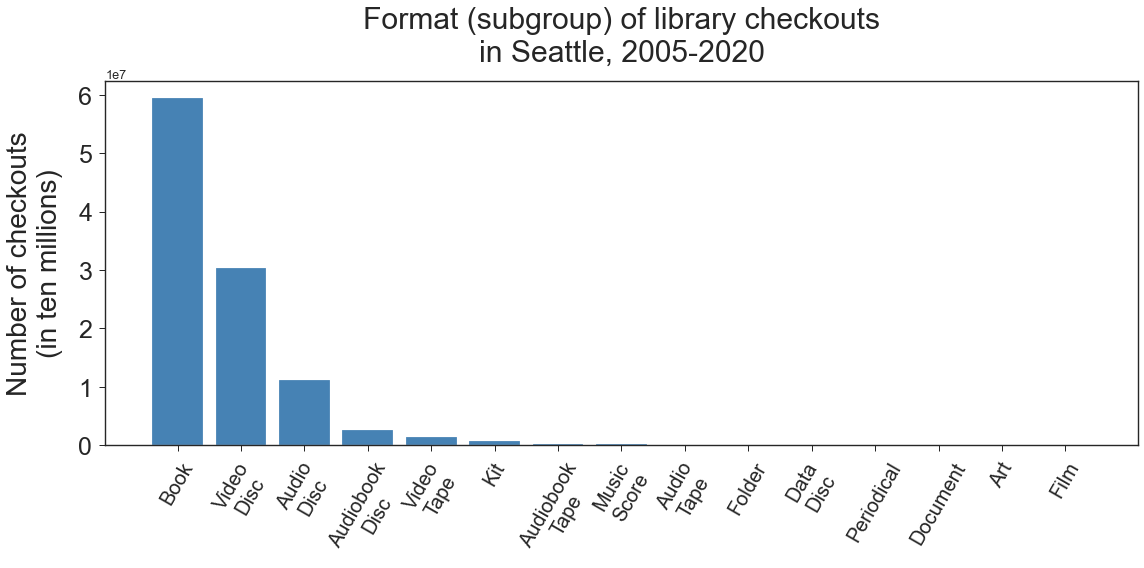

In [44]:
# create labels and prettify the plot
plt.figure(figsize=(16,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

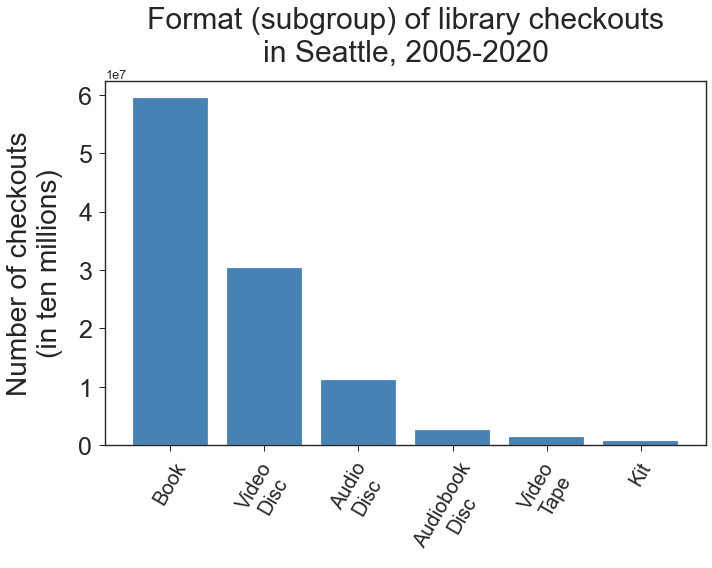

In [46]:
# top 6
col_counts = df_full['format_subgroup'].value_counts().head(6)

# create labels and prettify the plot
plt.figure(figsize=(10,8))
plt.title('Format (subgroup) of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(len(col_counts)), labels=labels_pretty, fontsize=20, rotation=60)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/format_subgroup_counts_top6.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Unsurprisingly, books make up the majority of physical items checked out at Seattle libraries, followed by movies and CDs.
- I would have guessed that audiobooks made up a larger portion of checkouts, but they only account for about 2.5% of the data.

### Analysis of `category_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [51]:
# raw counts
col_counts = df_full.category_group.value_counts()
col_counts

Fiction              65292861
Nonfiction           37539002
Other                 1741770
Language              1679452
Interlibrary Loan      192959
Reference               57420
Name: category_group, dtype: int64

In [52]:
# as a percentage of the data
df_full.category_group.value_counts(normalize=True) * 100

Fiction              61.305857
Nonfiction           35.246743
Other                 1.635412
Language              1.576899
Interlibrary Loan     0.181176
Reference             0.053914
Name: category_group, dtype: float64

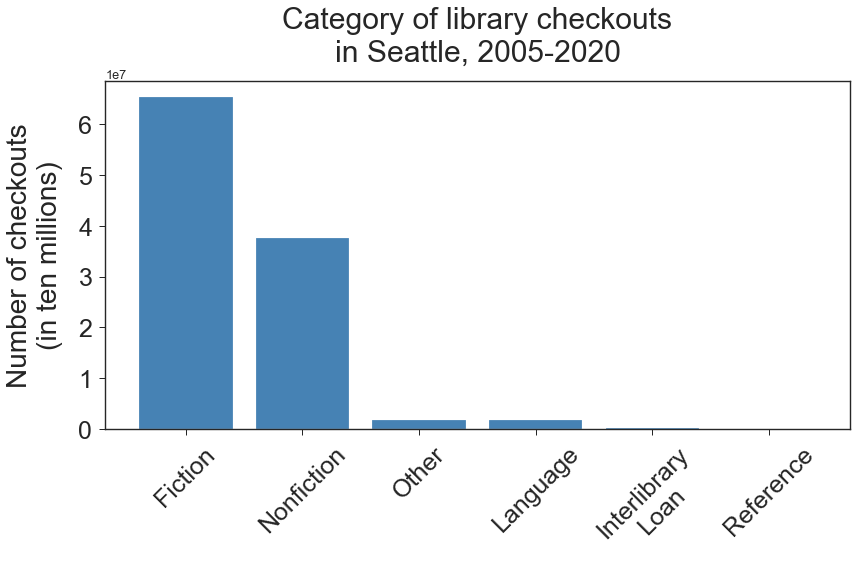

In [11]:
# prettify the plot
plt.figure(figsize=(12,8))
plt.title('Category of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
# plt.xlabel('Category', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.yticks(fontsize=25)

# prettify the x tick labels
labels_pretty = [label.replace(' ', '\n') for label in list(col_counts.index)]
plt.xticks(ticks=range(6), labels=labels_pretty, fontsize=25, rotation=45)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/category_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

### Analysis of `age_group`

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [53]:
# raw counts
col_counts = df_full.age_group.value_counts()
col_counts

Adult       71587854
Juvenile    31006173
Teen         3909816
Name: age_group, dtype: int64

In [54]:
# as a percentage of the data
df_full.age_group.value_counts(normalize=True) * 100

Adult       67.216217
Juvenile    29.112727
Teen         3.671056
Name: age_group, dtype: float64

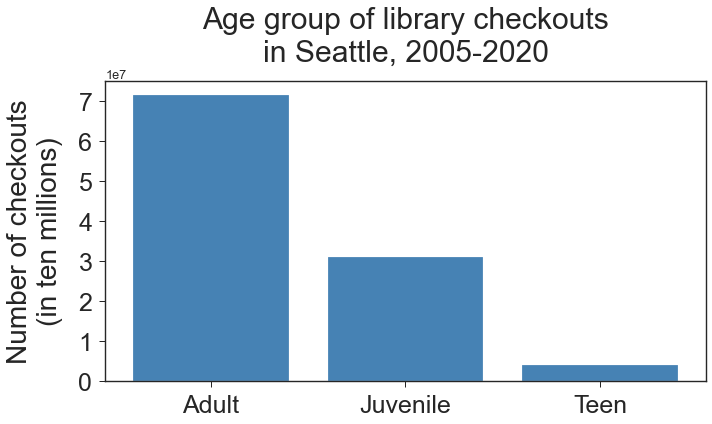

In [12]:
# prettify the plot
plt.figure(figsize=(10,6))
plt.title('Age group of library checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/age_group_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Two-thirds of checkouts are of `Adult` items, about one-third are `Juvenile` or kid's items.
- `Teen` items make up less than 4% of the data, which makes sense, given that `Teen` is such a specific age group with a fairly small range.
    - Is there a chance that teenagers think libraries are uncool? Impossible to tell with this data.

## Most popular items

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [13]:
%%time

# top 50 stats
df_full.title.value_counts().head(50)

CPU times: user 51.7 s, sys: 25.4 s, total: 1min 17s
Wall time: 1min 51s


Greatest hits                                73907
SPL HotSpot connecting Seattle               34217
Into the wild                                25151
Uncataloged Folder or Bag BAL                22608
Uncataloged Folder or Bag DWN                22504
Harry Potter and the half blood prince       22389
Twilight                                     21363
Where the wild things are                    21359
kite runner                                  20864
golden compass                               20861
Harry Potter and the sorcerers stone         19867
No country for old men                       19784
FlexTech Laptops                             19577
Cinderella                                   19566
Harry Potter and the Order of the Phoenix    19063
reader                                       18933
hunger games                                 17707
Atonement                                    17476
Harry Potter and the goblet of fire          17446
Uncataloged Folder or Bag GWD  

Perhaps unsurprisingly, the top 50 titles are mostly comprised of items that are both books and movies, as well as more generic terms such as `Greatest hits`; thus, I will have to perform a closer look at each format type and some specific items.

#### Important notes:
- Equipment plays a large role in Seattle's libraries, namely `SPL HotSpot connecting Seattle`, `FlexTech Laptops`, and `In Building Device Checkout`
    - Perhaps analyzing this across time can lead to further insights
    - Libraries play a large role in folks accessing the internet
- Several items are marked as `Uncataloged Folder or Bag`, followed by the code for whichever branch they are a part of; perhaps more investigation will be necessary here
- `Michael Clayton` appears to be the top item for items that are only either a book or a movie, not both
    - Followed by `Burn After Reading` and `Darjeeling Limited`
- All but the final `Harry Potter` book/movie appear on the list, which may be due to the fact that:
    - as a book, it came out in July 2007 (after the start date of this data)
    - as a movie, and perhaps more importantly as far as this data is concerned, it is actually split into *two* movies, unlike the other books/movies in the series
    
    
### Books

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 Books Overall

In [14]:
%%time

# top 25 stats
top25_books = df_full[df_full.format_subgroup == 'Book'].title.value_counts().head(25)

# take a look
top25_books

CPU times: user 36.6 s, sys: 1min 8s, total: 1min 45s
Wall time: 2min 47s


Dinosaurs                                 11210
Educated a memoir                         10958
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9927
Are you ready to play outside              9822
Whered you go Bernadette a novel           9600
Snow                                       9581
Chicka chicka boom boom                    9568
There is a bird on your head               9453
cat in the hat                             9246
Harry Potter and the half blood prince     9229
Go dog go                                  9194
My friend is sad                           9128
Pigs make me sneeze                        9103
Today I will fly                           8997
Goldilocks and the three bears             8945
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends               

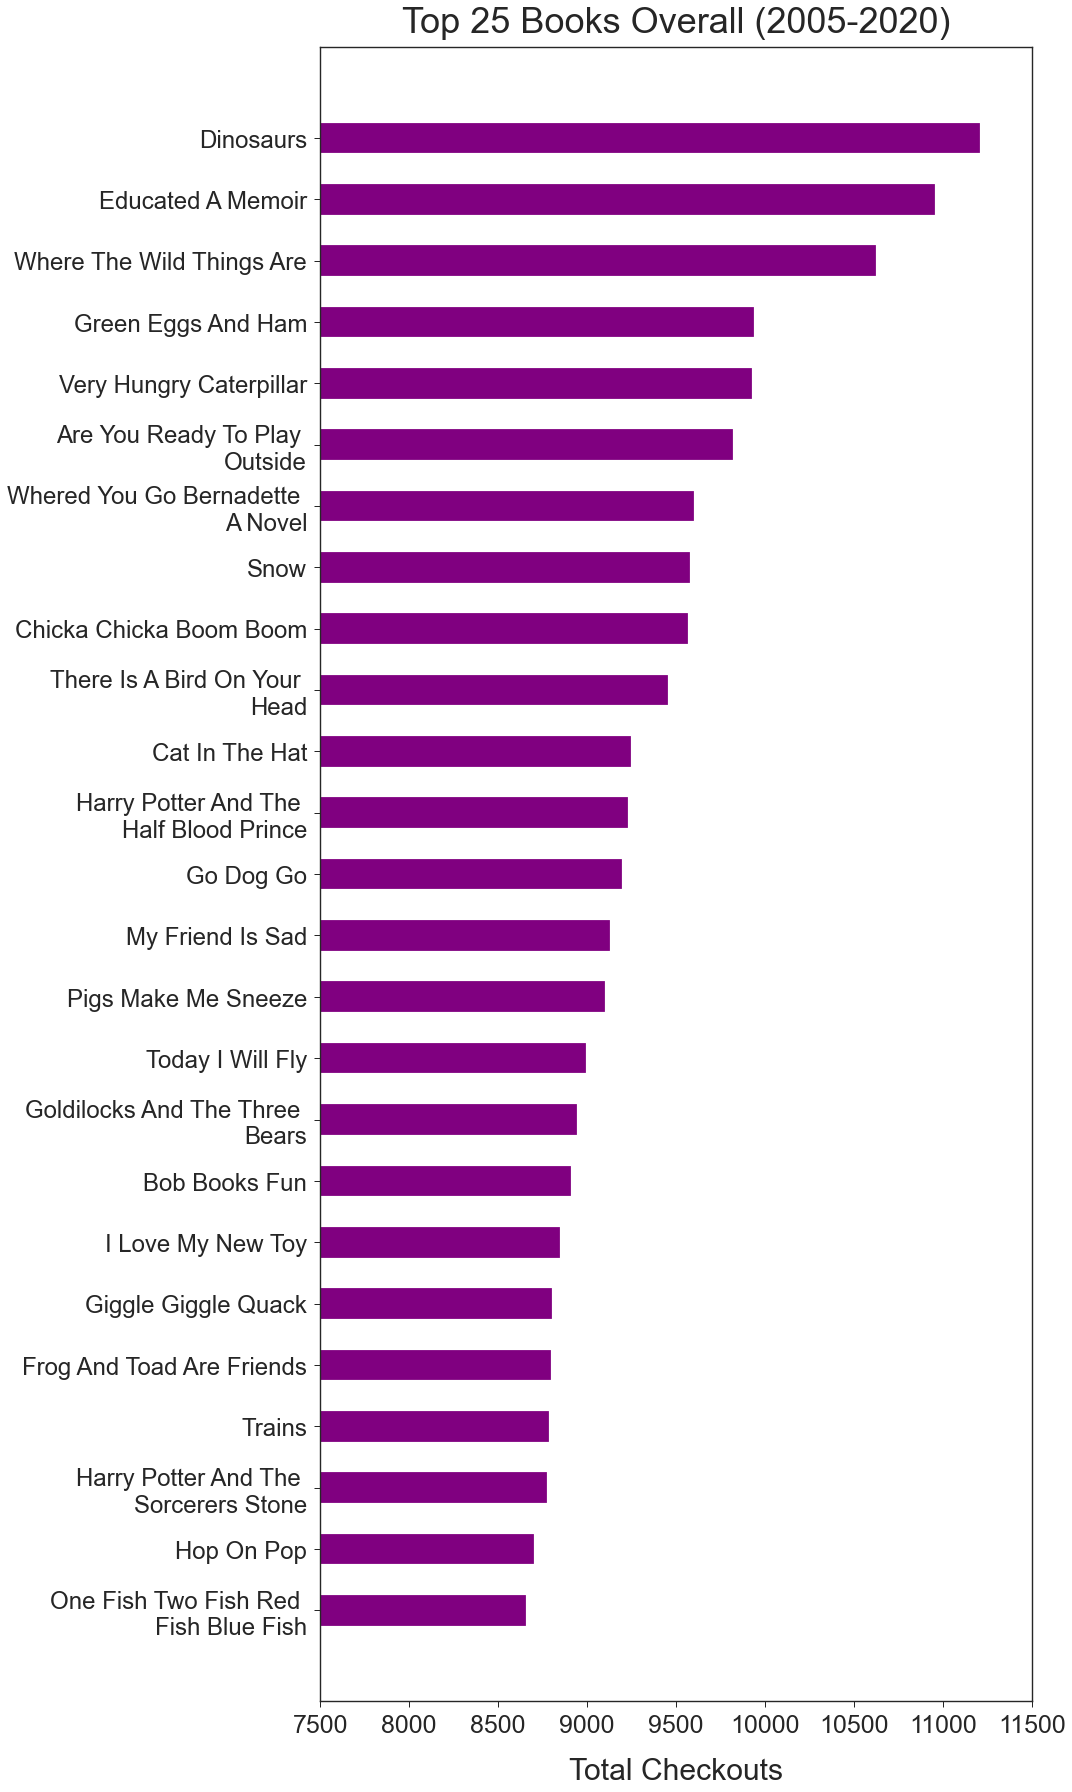

In [15]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_books.index][::-1], top25_books.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Other than `Educated` and `Where'd you go, Bernadette?`, all of these books are in the `Juvenile` age group, i.e. children's books.
    - While this does point to the fact that libraries are integral resources for young readers, it may also suggest that there are simply fewer (and possibly less diverse) options among `Juvenile` books.
    - By the time readers reach a certain age, they presumably have a wide variety of interests as well as many more books to choose from, so library activity gets spread out among a larger population of books.

- Simply put, this does not prove anything about who uses the library the most, but merely which items see the most activity. It is also worth pointing out that many of these can be read in a day, which increases turnover or the ability to change hands quickly and be checked out often.

- I'll now break this down by age group and fiction/nonfiction books.

#### Top 25 Books - Adult

In [16]:
%%time

# top 25 stats
top25_books_adult = df_full[(df_full.format_subgroup == 'Book') &
                            (df_full.age_group == 'Adult')].title.value_counts().head(25)

# take a look
top25_books_adult

CPU times: user 14.4 s, sys: 17.1 s, total: 31.6 s
Wall time: 39.5 s


Educated a memoir                                                                            10958
Whered you go Bernadette a novel                                                              9600
Where the crawdads sing                                                                       8652
Becoming                                                                                      8410
omnivores dilemma a natural history of four meals                                             7758
help                                                                                          7675
All the light we cannot see a novel                                                           7617
Gone girl a novel                                                                             7496
girl with the dragon tattoo                                                                   7402
Quiet the power of introverts in a world that cant stop talking                               7361
Never let 

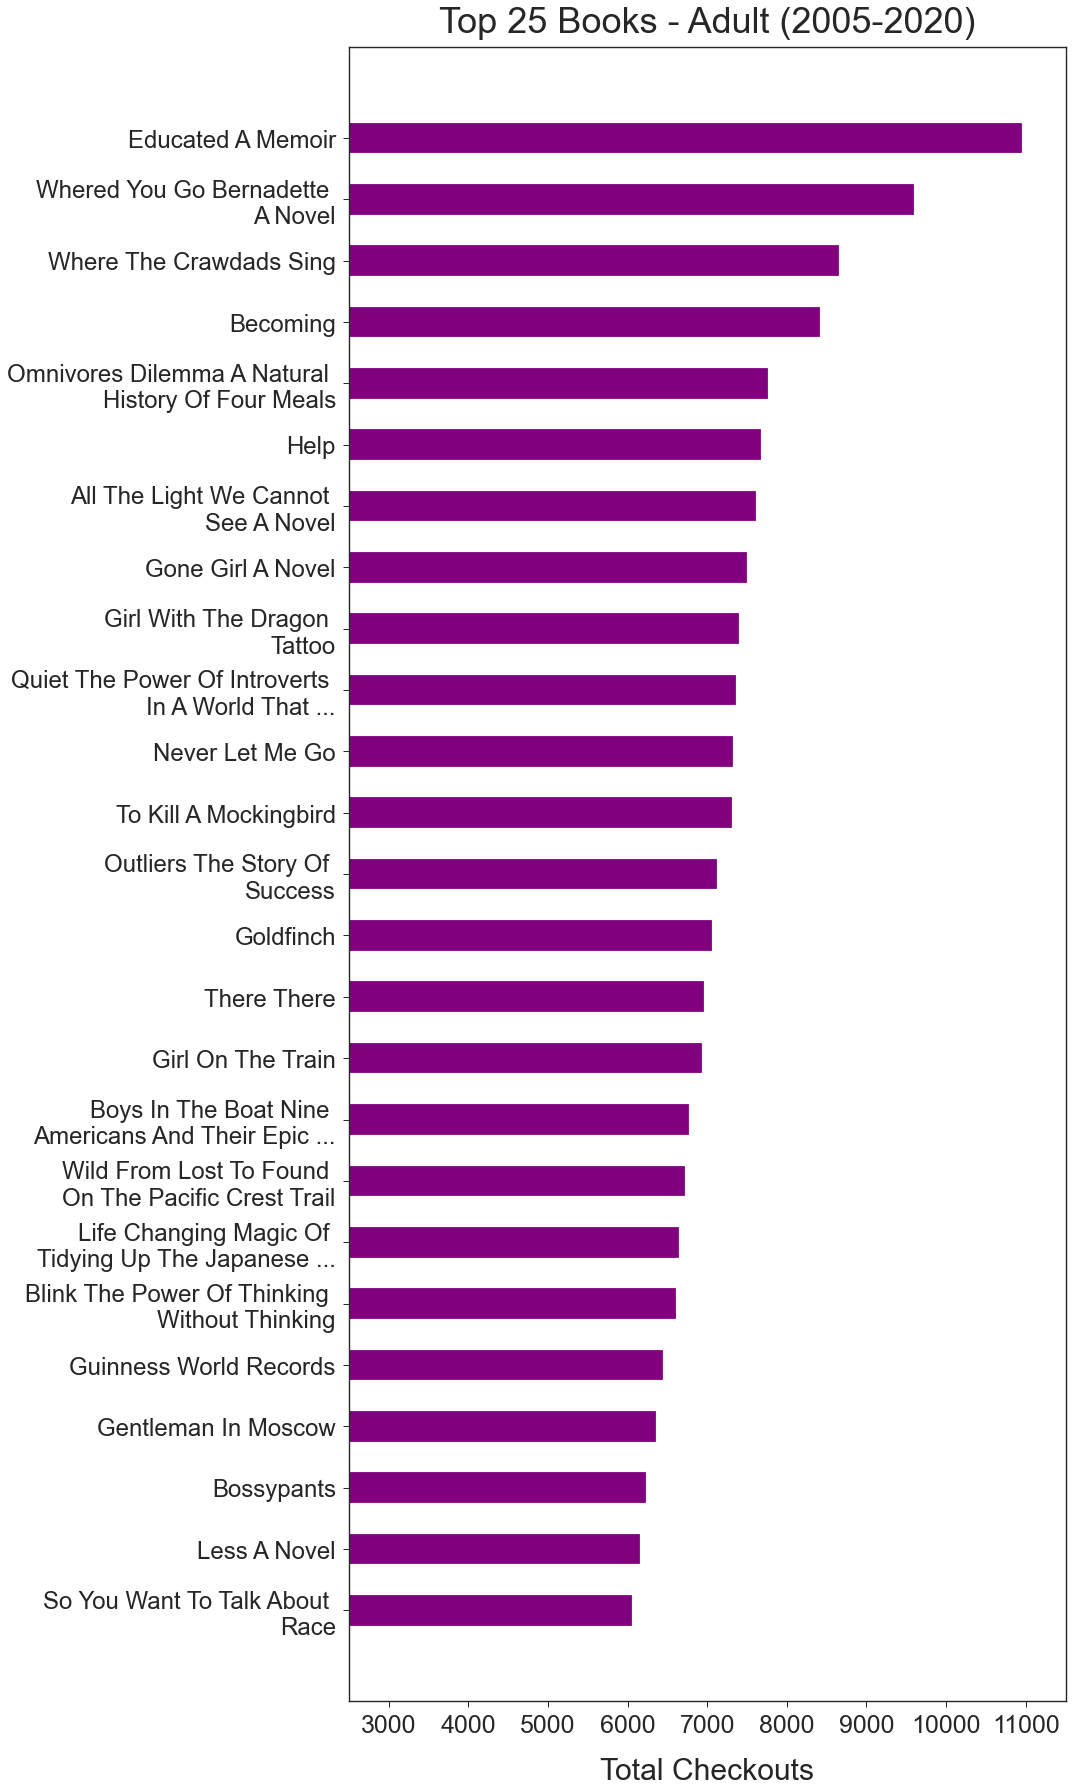

In [17]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 adult books
plt.barh([name_beautifier(x) for x in top25_books_adult.index][::-1],
         top25_books_adult.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- 7 out of the top 10 are female authors.
    - 14 out of 25 female authors, 10 out of 25 male authors, and 1 anthology (`Guinness Book of World Records`).
    - Again, it is impossible to determine whether this means females are more active than males at the library, for a variety of reasons, not least of which is that the gender of the author does not directly correlate with the the gender of the reader.
- Malcolm Gladwell appears on here twice, the only author to do so (`Outliers` and `Blink`).
- I'd like to further break this down into fiction and nonfiction. It appears that both are fairly well represented in this list:
    - 13 out of 25 are `Fiction`.
    - 12 out of 25 are `Nonfiction`.
- After the top 4, there is a fairly narrow range of the number of checkouts.

#### Top 25 Books - Teen

In [18]:
%%time

# top 25 stats
top25_books_teen = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Teen')].title.value_counts().head(25)

# take a look
top25_books_teen

CPU times: user 1.26 s, sys: 2.54 s, total: 3.8 s
Wall time: 5.64 s


hunger games                                   8608
book thief                                     8435
Catching fire                                  7869
Mockingjay                                     7835
absolutely true diary of a part time Indian    7780
fault in our stars                             6504
Twilight                                       5832
Divergent                                      4793
New moon                                       4778
perks of being a wallflower                    4084
Eclipse                                        4037
graveyard book                                 3756
Breaking dawn                                  3716
catcher in the rye                             3606
Insurgent                                      3429
Uglies                                         3404
Eleanor Park                                   3376
maze runner                                    3345
Bone Vol 1 Out from Boneville                  3317
Allegiant   

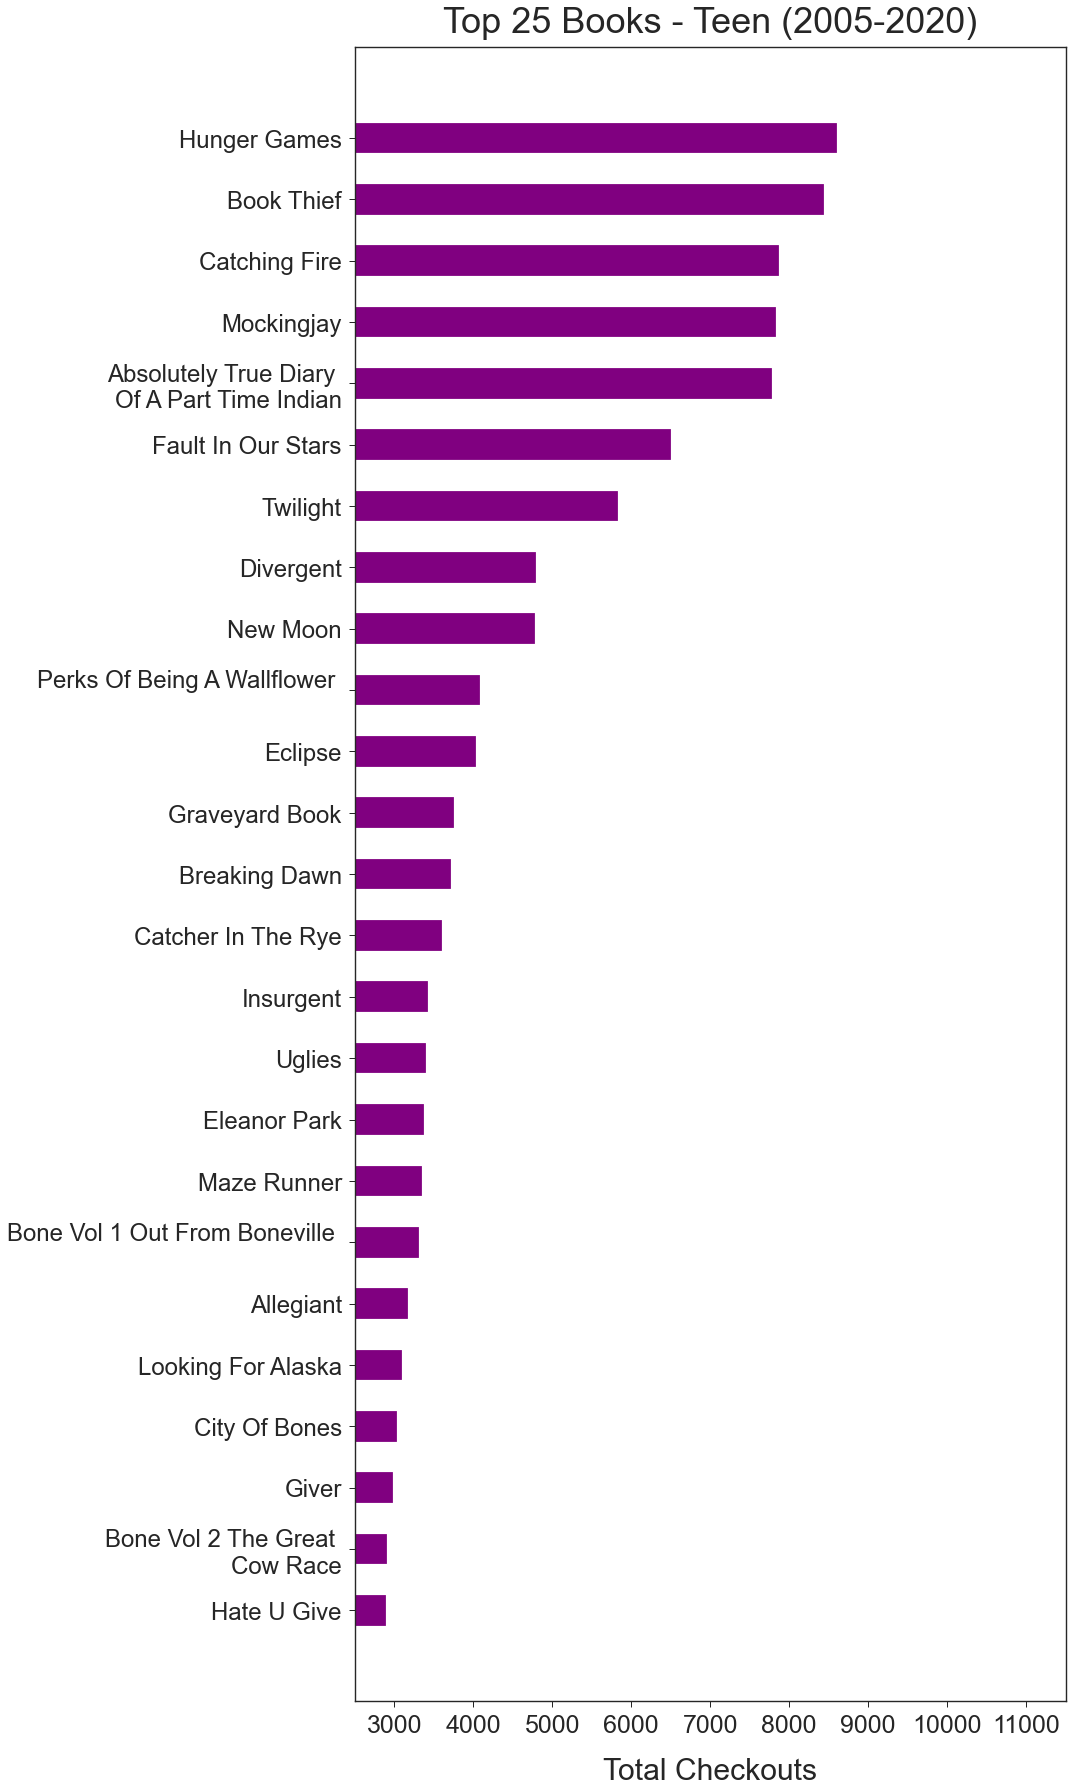

In [19]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Teen (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 teen books
plt.barh([name_beautifier(x) for x in top25_books_teen.index][::-1],
         top25_books_teen.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_teen_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Not too many surprises here, with the Twilight and Hunger Games series dominating.
- A couple of John Green's books make the list (`The Fault in Our Stars` and `Looking for Alaska`).
- In my opinion, `Catcher in the Rye` is a bit of an edge case; it makes sense to me that it is classified as `Teen`, although I'm sure a fair amount of adults read it as well, although I suppose that can be said of most of these. I guess it's probably a lot of folks who forgot to read it in school and wanted to see what the hubbub was about.
- Sherman Alexie makes the list! with `The Absolutely True Diary of a Part-Time Indian`.
- I was expecting more comic books and graphic novels, but that distinction is held only by the the first two installations of the `Bone` comic books.
- Alas, no poetry.
- After the top 5, there is a notably steep decline in the popularity of the rest of the items on the list.

#### Top 25 Books - Juvenile (Children's Books)

In [20]:
%%time

# top 25 stats
top25_books_kids = df_full[(df_full.format_subgroup == 'Book') &
                           (df_full.age_group == 'Juvenile')].title.value_counts().head(25)

# take a look
top25_books_kids

CPU times: user 8.63 s, sys: 15.5 s, total: 24.2 s
Wall time: 32.8 s


Dinosaurs                                 11076
Where the wild things are                 10623
Green eggs and ham                         9937
very hungry caterpillar                    9926
Are you ready to play outside              9822
Chicka chicka boom boom                    9567
There is a bird on your head               9453
cat in the hat                             9246
Go dog go                                  9194
Harry Potter and the half blood prince     9172
My friend is sad                           9128
Pigs make me sneeze                        9096
Today I will fly                           8997
Goldilocks and the three bears             8918
Bob books fun                              8912
I love my new toy                          8846
Giggle giggle quack                        8804
Frog and Toad are friends                  8800
Trains                                     8784
Hop on Pop                                 8703
One fish two fish red fish blue fish    

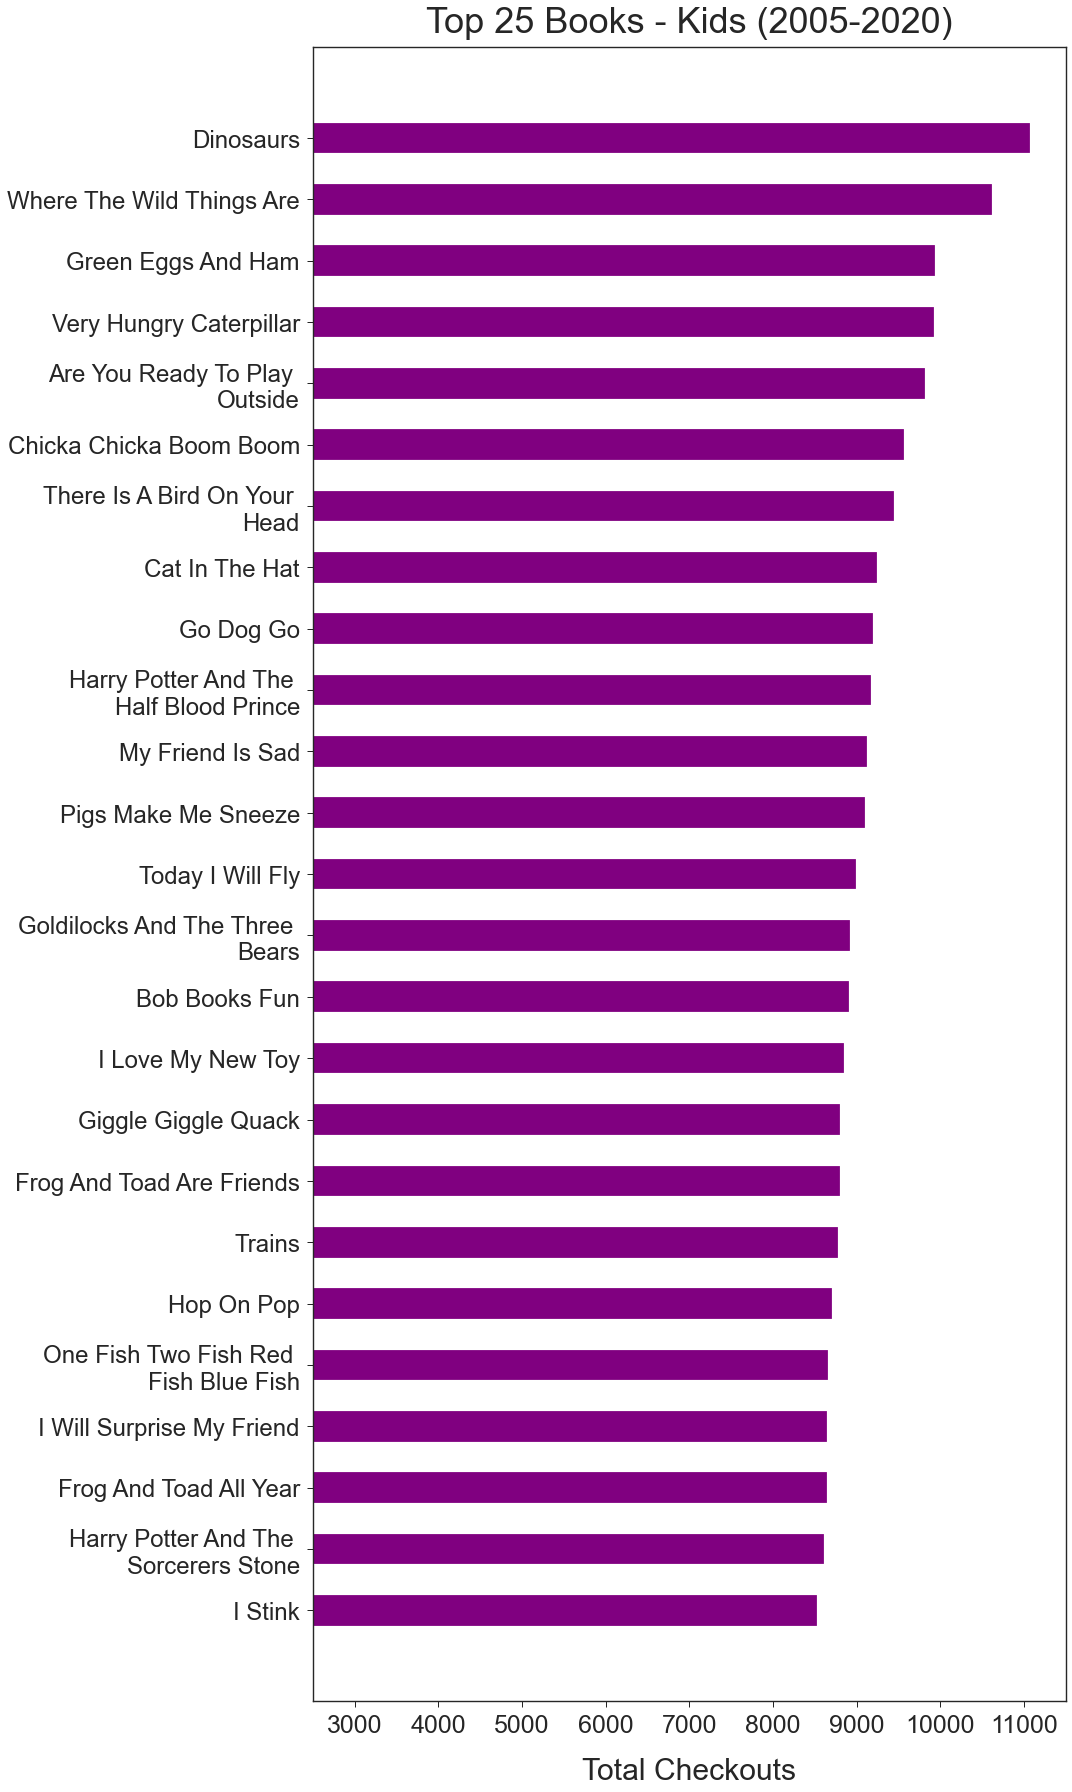

In [21]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Kids (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_kids.index][::-1],
         top25_books_kids.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_kids_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- It's unclear to me if `Dinosaurs` refers to a single book or if it is a series that is lumped together into a single title. My guess is it one of those larger, rather thin picture books.
- Harry Potter faces some stiff competition!
    - And I'm surprised that `The Half-Blood Prince` is the most checked out book in the series.
- Unsurprisingly, Dr. Seuss is well represented.
- Compared to `Adult` and `Teen` books, children's books have a much tighter range toward that top spot.
    - A possible reason for this is that they are such quick reads that they can either be re-read (re-checked out) numerous times or read alongside numerous other books within one trip to the library.

#### Top 25 Books - Adult Fiction

In [22]:
%%time

# top 25 stats
top25_books_adult_fiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Fiction')
                                ].title.value_counts().head(25)

# take a look
top25_books_adult_fiction

CPU times: user 5.82 s, sys: 9.63 s, total: 15.4 s
Wall time: 21.1 s


Whered you go Bernadette a novel                   9600
Where the crawdads sing                            8652
help                                               7675
All the light we cannot see a novel                7561
Gone girl a novel                                  7496
girl with the dragon tattoo                        7346
Never let me go                                    7322
To kill a mockingbird                              7305
goldfinch                                          7059
There there                                        6957
girl on the train                                  6938
gentleman in Moscow                                6362
Less a novel                                       6146
Pachinko                                           6014
Hotel on the corner of bitter and sweet a novel    6003
thousand splendid suns                             5971
overstory a novel                                  5887
kite runner                                     

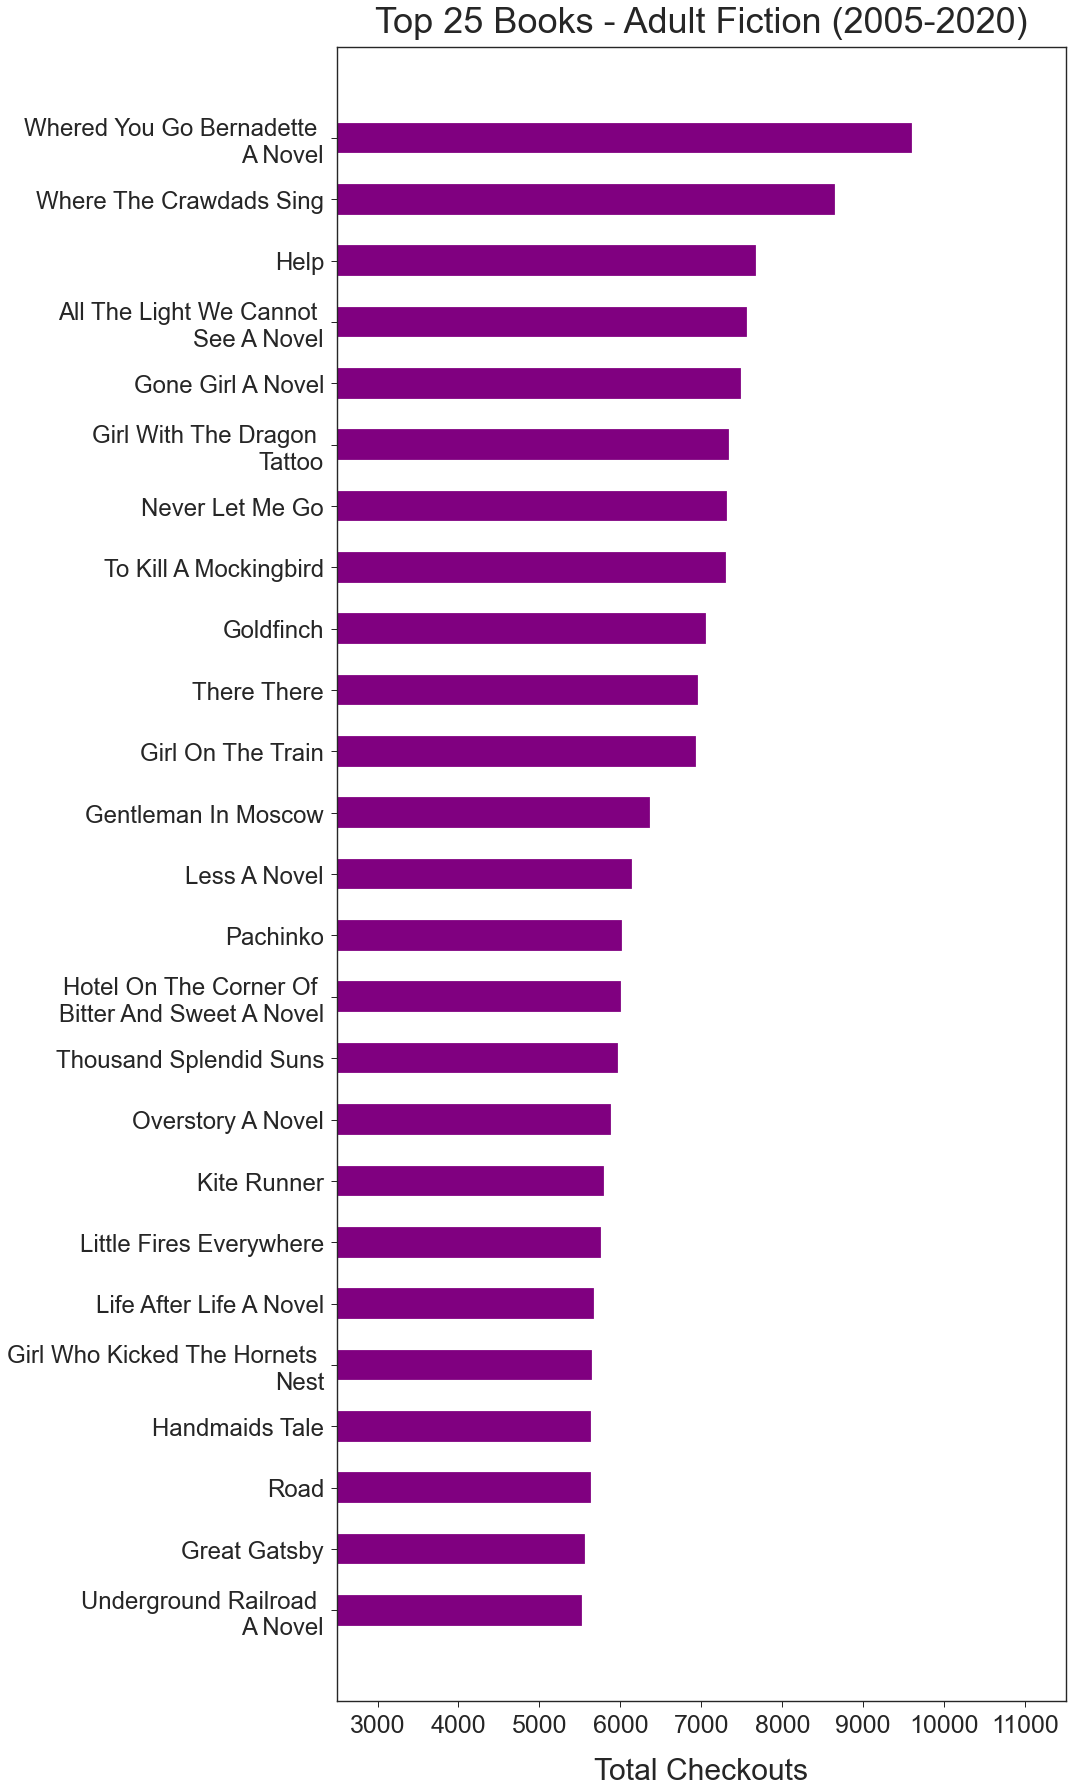

In [23]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Fiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_fiction.index][::-1],
         top25_books_adult_fiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_fiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of `Fiction` books appears to love calling attention to the fact that it is a novel.
- A fair amount of books from within series, as well as books that have either been turned into tv shows or movies.
    - Are they movies/shows because they were already popular as books? Or did movies/shows make them more popular as books? or both?
- A couple of classics, thinking specifically of `To Kill a Mockingbird` and ` The Great Gatsby`.

#### Top 25 Books - Adult Nonfiction

In [24]:
%%time

# top 25 stats
top25_books_adult_nonfiction = df_full[
                                        (df_full.format_subgroup == 'Book') &
                                        (df_full.age_group == 'Adult') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(25)

# take a look
top25_books_adult_nonfiction

CPU times: user 7.56 s, sys: 14.3 s, total: 21.8 s
Wall time: 32.9 s


Educated a memoir                                                                                                                           10735
Becoming                                                                                                                                     8355
omnivores dilemma a natural history of four meals                                                                                            7617
Quiet the power of introverts in a world that cant stop talking                                                                              7269
Outliers the story of success                                                                                                                6929
boys in the boat nine Americans and their epic quest for gold at the 1936 Berlin Olympics                                                    6755
Wild from lost to found on the Pacific Crest Trail                                                                          

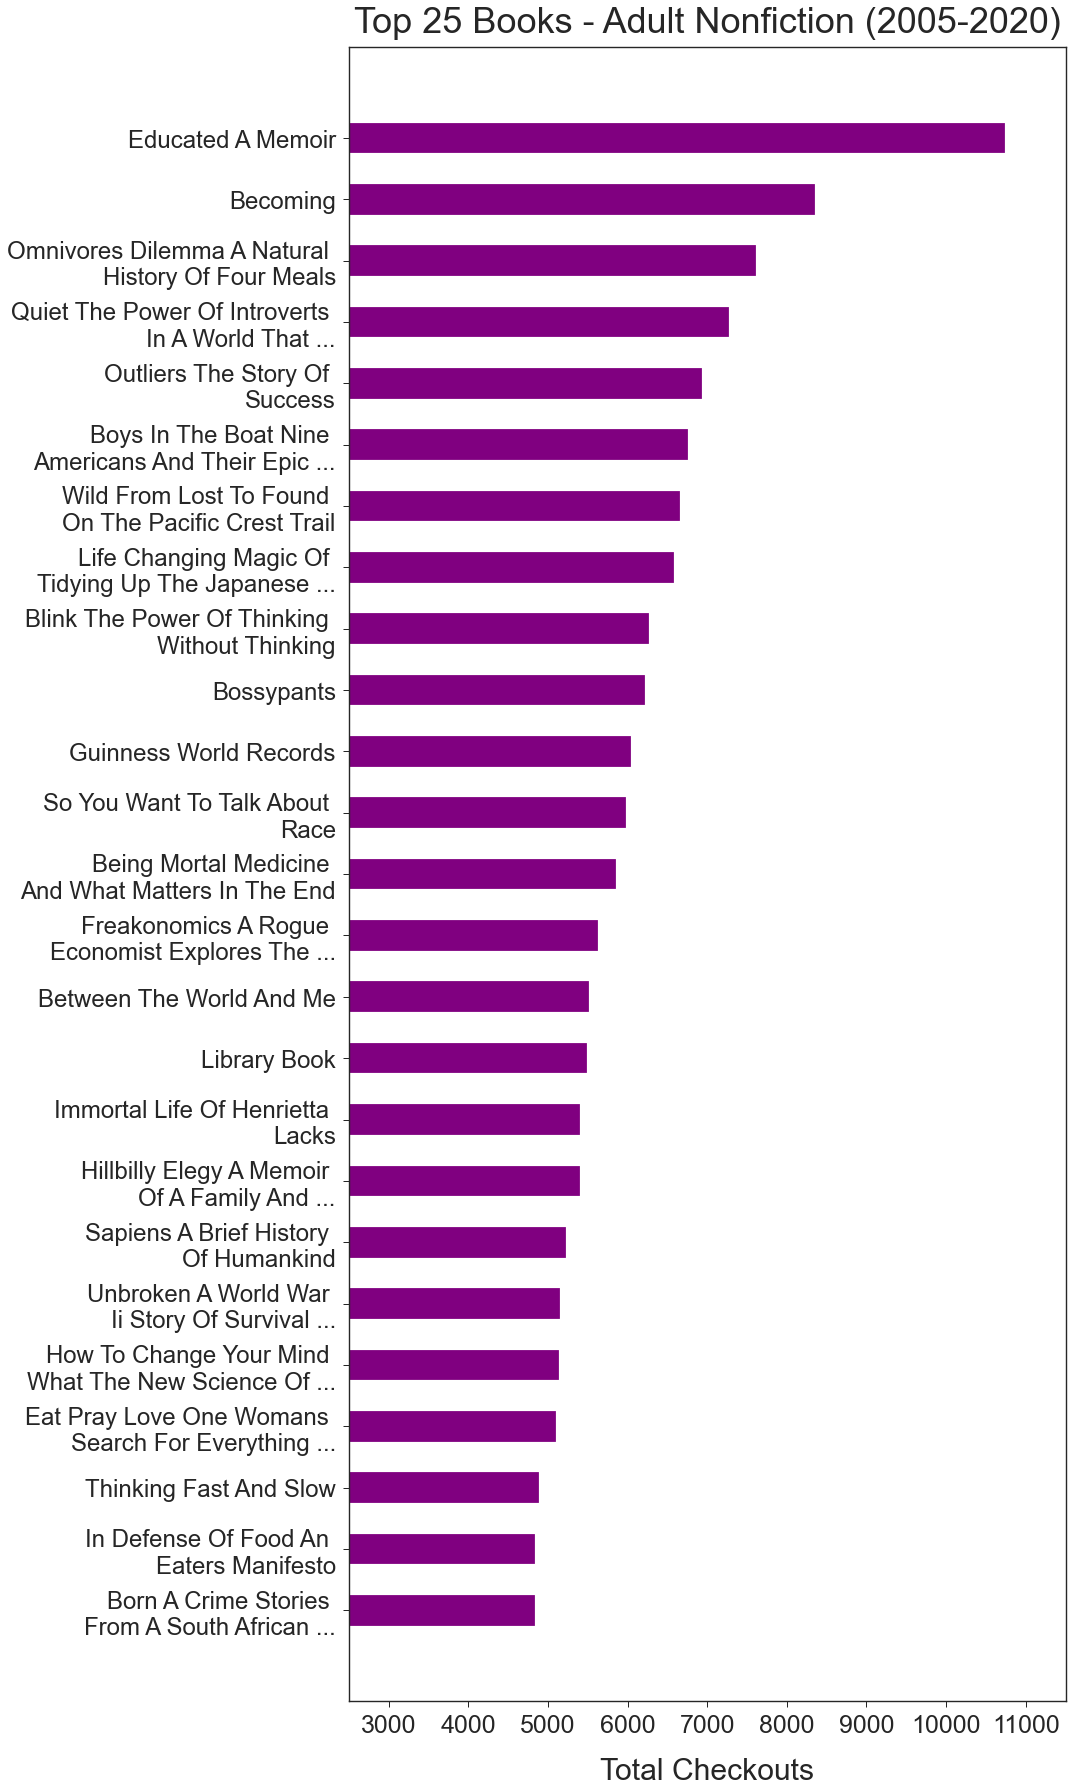

In [25]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Books - Adult Nonfiction (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=2500, right=11500)

# plot top 25 kids books
plt.barh([name_beautifier(x) for x in top25_books_adult_nonfiction.index][::-1],
         top25_books_adult_nonfiction.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_books_adult_nonfiction_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Lots of memoirs.
- Unsurprisingly, Marie Kondo makes the list! and Michael Pollan defeats Malcolm Gladwell by being on the list three times.
- I am intrigued by the book known as `Library Book`. It may just be a catchall title and not refer to any particular book.
- A couple of comedians (Tiny Fey and Trevor Noah) have popular nonfiction books.

#### Audiobooks

In [77]:
%%time

# top 25 stats
top25_audiobooks = df_full[(df_full.format_subgroup == 'Audiobook Disc') |
                           (df_full.format_subgroup == 'Audiobook Tape')].title.value_counts().head(25)

# take a look
top25_audiobooks

CPU times: user 861 ms, sys: 191 ms, total: 1.05 s
Wall time: 1.1 s


Pimsleur language programs Spanish 1 A the complete course                     6133
Harry Potter and the half blood prince                                         4394
Pimsleur language programs Spanish 1 B the complete course                     4230
Harry Potter and the sorcerers stone                                           3957
Harry Potter and the deathly hallows                                           3671
Spanish Latin American the short course                                        3594
Harry Potter and the chamber of secrets                                        3355
Pimsleur language programs French I A the complete course                      3227
Harry Potter and the Order of the Phoenix                                      3005
Pimsleur language programs Spanish II A the complete course                    2941
Harry Potter and the goblet of fire                                            2899
When you are engulfed in flames                                             

- Lots of language tapes.
- As I suspected, Harry Potter is a huge presence here.
- Shout out to David Sedaris, although I'm surprised that that is the particular audiobook that made the list.

### Movies

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Top 25 movies overall

In [56]:
%%time

# top 25 stats
top25_movies = df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

# take a look
top25_movies

CPU times: user 10.3 s, sys: 24.5 s, total: 34.8 s
Wall time: 49.4 s


Into the wild                      19011
Michael Clayton                    17334
Burn after reading                 17049
Darjeeling Limited                 16481
Atonement                          16363
No country for old men             16285
reader                             16151
Doubt                              16133
Vicky Cristina Barcelona           15818
other Boleyn girl                  15664
Juno                               15571
curious case of Benjamin Button    15287
Slumdog millionaire                15253
WALL E                             14991
Gone baby gone                     14662
Milk                               14424
Savages                            14175
Once                               14128
Charlie Wilsons war                13862
Rachel getting married             13799
Becoming Jane                      13729
Mamma mia                          13710
golden compass                     13662
kite runner                        13541
Quantum of solac

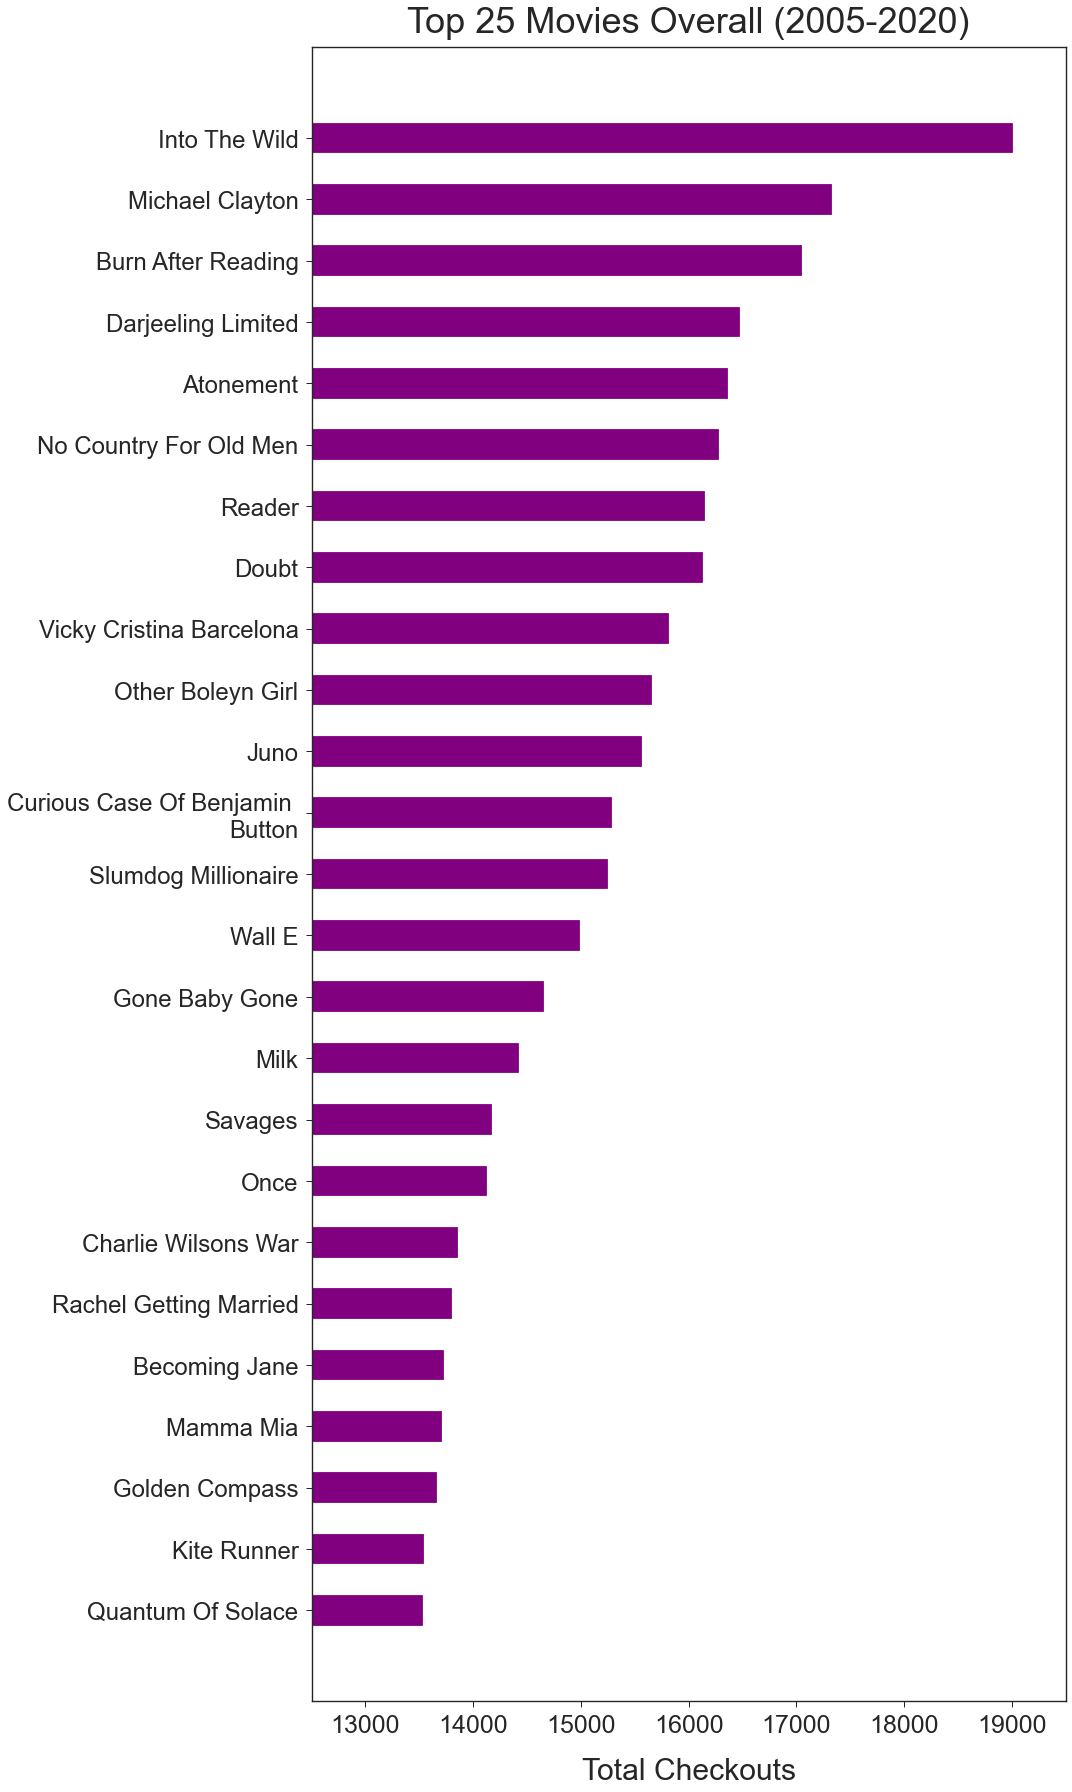

In [57]:
# create labels and prettify the plot
plt.figure(figsize=(15,25))
plt.title('Top 25 Movies Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=12500, right=19500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top25_movies.index][::-1], top25_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top25_movies_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

#### Top 10 kid's movies

In [60]:
%%time

# top 10 stats
top10_kids_movies = df_full[(df_full.format_subgroup == 'Video Disc') &
                            (df_full.age_group == 'Juvenile')].title.value_counts().head(10)

# take a look
top10_kids_movies

CPU times: user 1.02 s, sys: 81.7 ms, total: 1.1 s
Wall time: 1.1 s


WALL E                                 14991
Up                                     12277
Enchanted                              12026
Ratatouille                            11540
Kung fu panda                          11225
Bolt                                    9866
Cinderella                              9807
Charlottes web                          9265
chronicles of Narnia Prince Caspian     9021
Frozen                                  8976
Name: title, dtype: int64

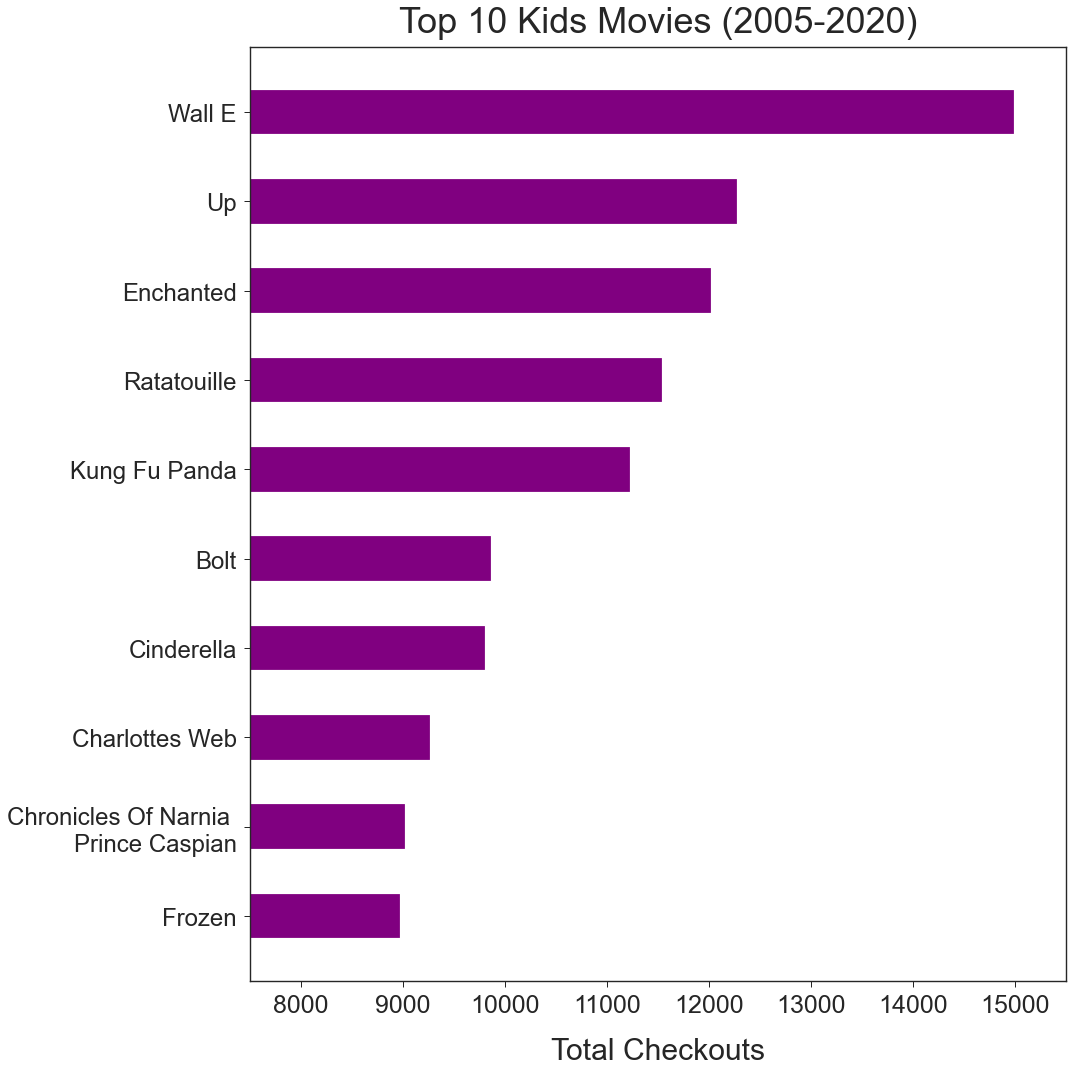

In [64]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Kids Movies (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=7500, right=15500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_kids_movies.index][::-1],
         top10_kids_movies.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_kids_movies_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

#### Top 10 movies - Nonfiction

In [67]:
%%time

# top 10 stats
top10_documentaries = df_full[
                                        (df_full.format_subgroup == 'Video Disc') &
                                        (df_full.category_group == 'Nonfiction')
                                    ].title.value_counts().head(10)

# take a look
top10_documentaries

CPU times: user 988 ms, sys: 126 ms, total: 1.11 s
Wall time: 1.12 s


Sicko                                  10764
March of the penguins                   8255
Religulous                              7982
Man on wire                             7722
Food Inc                                6736
inconvenient truth a global warning     6428
Grizzly man                             5467
Inside job                              5028
Jesus camp                              4800
Fahrenheit 9 11                         4421
Name: title, dtype: int64

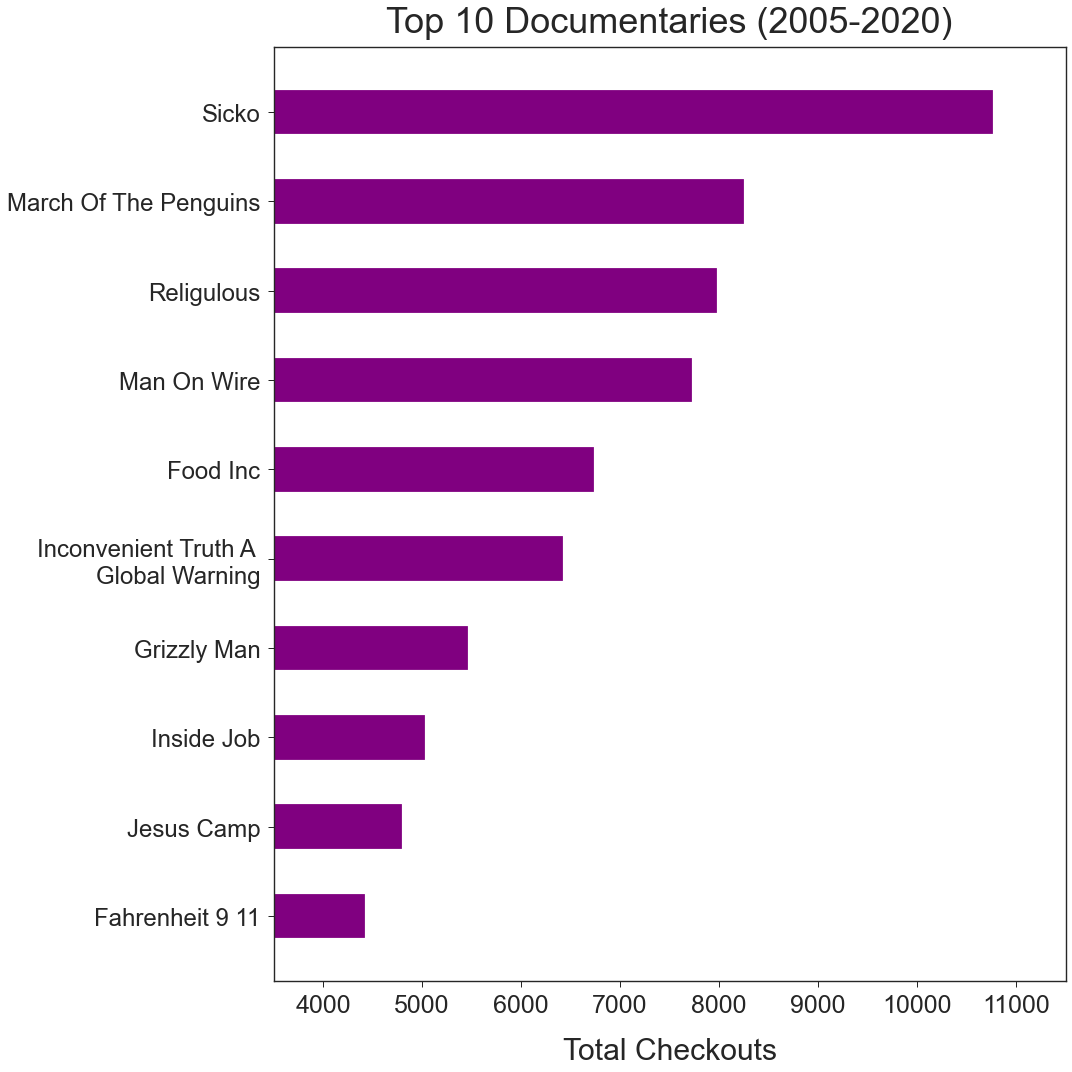

In [68]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 Documentaries (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=3500, right=11500)

# plot top 25 books
plt.barh([name_beautifier(x) for x in top10_documentaries.index][::-1],
         top10_documentaries.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_documentaries_hbar.png', 
            bbox_inches='tight', transparent=True)
plt.show()

- Michael Moore makes the Top 10 twice, in the #1 and #10 spot.

#### Top 10 VHS tapes

In [69]:
%%time

# top 10 stats
top10_tapes = df_full[(df_full.format_subgroup == 'Video Tape')].title.value_counts().head(10)

# take a look
top10_tapes

CPU times: user 516 ms, sys: 1.08 s, total: 1.6 s
Wall time: 3.25 s


pianist                  1784
Adaptation               1746
Oceans 11                1696
Moulin Rouge             1679
Chocolat                 1582
Catch me if you can      1576
Bend it like Beckham     1562
beautiful mind           1557
Bowling for Columbine    1511
Hours                    1510
Name: title, dtype: int64

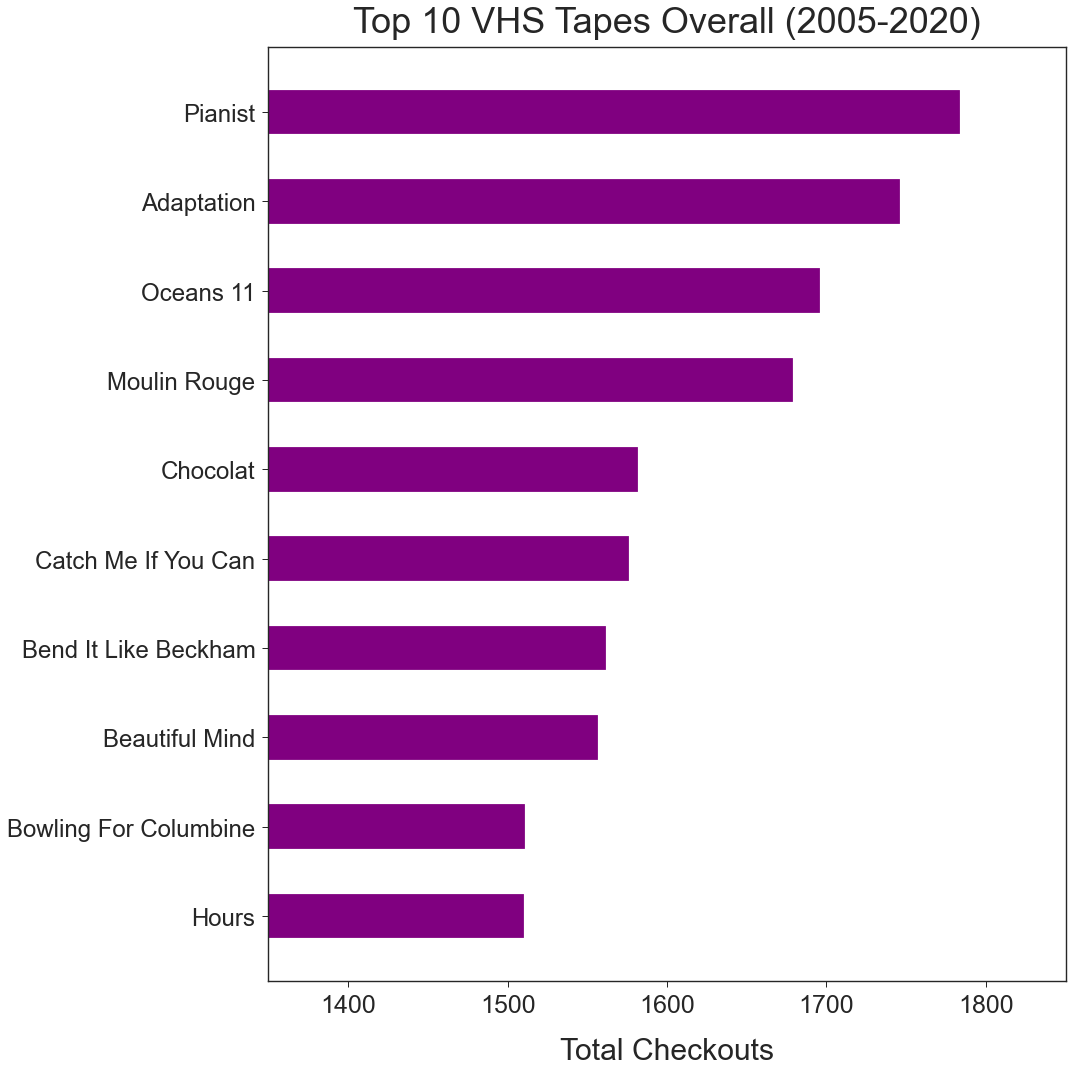

In [72]:
# create labels and prettify the plot
plt.figure(figsize=(15,15))
plt.title('Top 10 VHS Tapes Overall (2005-2020)', fontsize=36, pad=15)
plt.xlabel('Total Checkouts', fontsize=30, labelpad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=24)
plt.xlim(left=1350, right=1850)

# plot top 10 books
plt.barh([name_beautifier(x) for x in top10_tapes.index][::-1],
         top10_tapes.values[::-1], color='purple', height=0.5)

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/top10_tapes_hbar.png', 
            bbox_inches='tight', transparent=True)

plt.show()

I really like this as a snapshot of what folks were watching as DVD and eventually Blu Ray was taking over.

- These are all movies released between 2000 and 2002, including several Best Picture nominees (`Chocolat`, `Moulin Rouge!`, `The Hours`, `The Pianist`) and one winner (`Beautiful Mind`).
    - `Adaptation` received a nomination for Best Original Screenplay (and happens to be one of my favorite movies!)
- Again, Michael Moore makes the list! the only documentary to do so.
- Special shoutout to `Bend It Like Beckham`, which certainly holds a special (albeit polarizing) place in the teen movie zeitgeist.

### Music

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

#### Greatest hits

I noticed that there is a catchall title of `Greatest hits` that refers to CDs across multiple genres, as seen in the snippet below. I'm now curious as to which types of "greatest hits" are most popular in the Seattle Library system.

In [26]:
%%time

# had to sort by date or else it is sorted by format_group and only shows "Print" in the `.head()` view
df_full[df_full.title == 'Greatest hits'].sort_values('date').head(20)

CPU times: user 8.06 s, sys: 16.2 s, total: 24.3 s
Wall time: 37.4 s


,title,subjects,date,format_group,format_subgroup,category_group,age_group
36950360,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990, Ro...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36841964,Greatest hits,"Rock music 1971 1980, Rock music 1961 1970",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36861318,Greatest hits,"Popular music 1951 1960, Popular music 1961 19...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36931813,Greatest hits,Rock music 1961 1970,2005-04-13,Media,Audio Disc,Nonfiction,Adult
37002937,Greatest hits,"Rock music 1971 1980, Rock music 1981 1990",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36938769,Greatest hits,"Folk music United States, Folk songs English U...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36793193,Greatest hits,"Contemporary Christian music, Gospel music",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36963817,Greatest hits,"Piano music Jazz, Jazz 1921 1930",2005-04-13,Media,Audio Disc,Nonfiction,Adult
70456703,Greatest hits,"Popular music Ireland 1991 2000, Popular music...",2005-04-13,Media,Audio Disc,Nonfiction,Adult
36956800,Greatest hits,"Rock music 1981 1990, Rock music 1961 1970",2005-04-14,Media,Audio Disc,Nonfiction,Adult


I'll subset out entries with this title and clean/combine entries into their applicable genres.

In [27]:
# subset
greatest_hits = df_full[df_full.title == 'Greatest hits']

CPU times: user 5.13 s, sys: 5.48 s, total: 10.6 s
Wall time: 10.7 s


In [28]:
# list of genres
## NOTE: order is important here
##       "popular" is last so that if any other genre is used, the latter genre will take priority
music_genres = ['gospel', 'soul', 'operas', 'christian', 'reggae', 'humorous', 'orchestral', 
                'childrens', 'jazz', 'folk', 'piano', 'blues', 'country', 'rap', 'rock', 'popular']

In [29]:
# use first word to determine category
conditions_1 = [
    greatest_hits.subjects.str.lower().str.startswith(genre) for genre in music_genres  
]

# use first applicable genre that is found in the string to determine category
conditions_2 = [
    greatest_hits.subjects.str.lower().str.contains(genre) for genre in music_genres 
]

# combine conditions
conditions = conditions_1 + conditions_2

# create labels (x2 to match shape of conditions)
choices = [genre for genre in music_genres] * 2

In [30]:
# transform
greatest_hits['subjects'] = np.select(conditions, choices, 'other')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# obtain counts for each genre
greatest_hits.subjects.value_counts()

rock          41925
popular       14205
rap            5070
country        4603
folk           2431
jazz           2197
soul           1706
piano           770
blues           483
gospel          142
christian       112
operas           87
orchestral       86
childrens        33
humorous         33
reggae           24
Name: subjects, dtype: int64

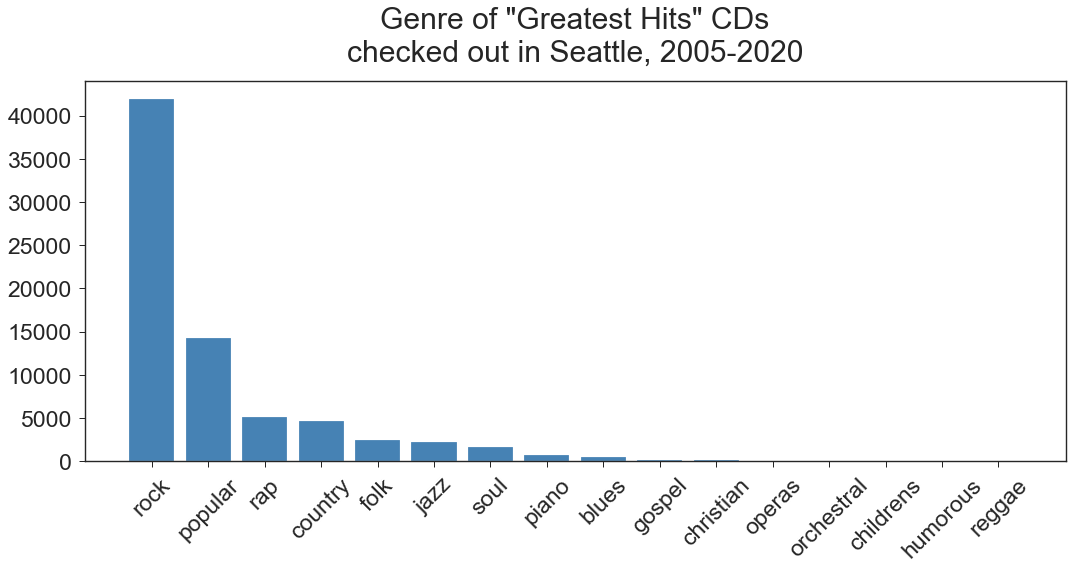

In [32]:
# obtain counts for each genre
col_counts = greatest_hits.subjects.value_counts()

# prettify the plot
plt.figure(figsize=(15,8))
plt.title('Genre of "Greatest Hits" CDs\nchecked out in Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.ylabel('', fontsize=28, labelpad=15)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23)

# plot counts
plt.bar(col_counts.index, col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/greatest_hits_genre_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Perhaps unsurprisingly, rock music has a commanding lead, followed by pop music.
- Rap narrowly edges out country music.
- The bottom five all had fewer than 100 checkouts.

### Equipment

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

The group `Equipment` only accounts for about 0.065% of the data, but I'm still interested in what sorts of items it is comprised of.

In [34]:
# equipment counts
top_equipment = df_full[df_full.format_group == 'Equipment'].title.value_counts()

# take a look
top_equipment

CPU times: user 117 ms, sys: 458 ms, total: 574 ms
Wall time: 1.2 s


SPL HotSpot connecting Seattle    34217
FlexTech Laptops                  19577
In Building Device Checkout       15399
Uncataloged USB floppy drives        18
Name: title, dtype: int64

- For the purposes of the below graph, I won't include `Uncataloged USB floppy drives` as there are so few checkouts, but I did want to give a quick shout out to one of the most beloved memory storage systems. Go floppy!

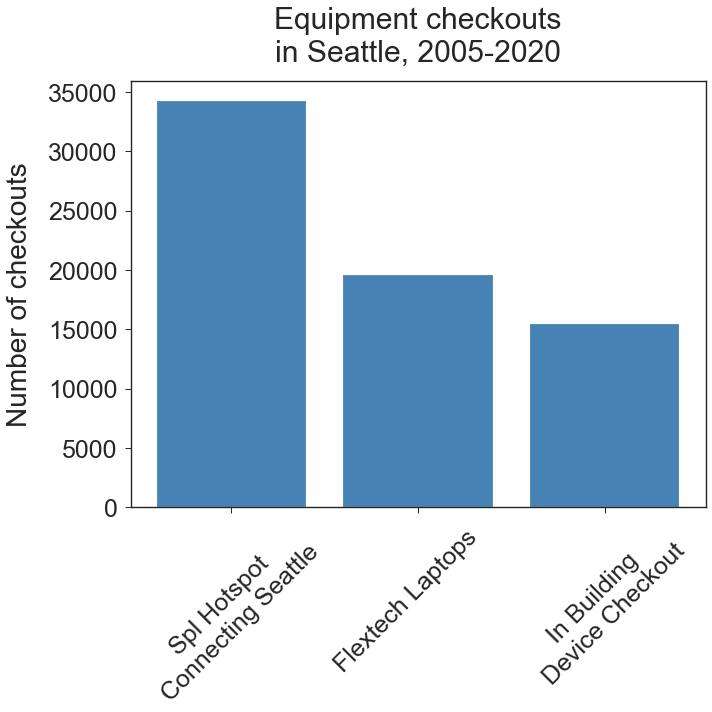

In [39]:
col_counts = df_full[df_full.format_group == 'Equipment'].title.value_counts().head(3)

# create labels and prettify the plot
plt.figure(figsize=(10,10))
plt.title('Equipment checkouts\nin Seattle, 2005-2020', 
          fontsize=30, pad=20)
plt.suptitle('')
# plt.xlabel('Format', fontsize=28, labelpad=15)
plt.ylabel('Number of checkouts', fontsize=28, labelpad=15)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)

# plot counts
plt.bar([name_beautifier(x, 15) for x in col_counts.index], col_counts.values, color='steelblue')

# prepare to save and display
plt.tight_layout()

# uncomment to save
plt.savefig('charts/equipment_counts.png', 
            bbox_inches='tight', transparent=True)

plt.show()

- Most of the equipment appears to be bringing computers and the internet to Seattle residents. If I had to guess, I would say that this also applies to the more general `In Building Device Checkout`.

Now I'll take a look at what is going on in the `Other` format group.

### Other

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

Overall, the group `Other` only accounts for about 0.2% of the data. Still, it is worth exploring what is within the group.

In [41]:
# other counts
top_other = df_full[df_full.format_group == 'Other'].title.value_counts().head(25)

# take a look
top_other

CPU times: user 167 ms, sys: 73.8 ms, total: 241 ms
Wall time: 292 ms


Man of steel                                         724
Girls The complete first season                      390
Sisterland a novel                                   194
Vikings The complete first season                    194
10 things I hate about you                           189
Duck Dodgers Deep space duck                         174
What money cant buy the moral limits of markets      150
Enough said                                          141
good lord bird                                       135
Insidious Chapter 2                                  135
Florida                                              128
Looper                                               110
Django unchained                                      84
Away in a star sled                                   83
Big Sur                                               80
red tent                                              74
third coast when Chicago built the American dream     71
mark of Athena                 

In [42]:
# total number of items with the format group "Unique"
len(df_full[df_full.format_group == 'Other'].title.unique())

94078

- Granted the above is a small snapshot of the entire picture, but it's a bit mysterious as to why these items are marked as `Other`, other than simple clerical errors.
    - I'm seeing mostly movies and tv shows, maybe a book or two (*Sisterland*, and perhaps *Big Sur* by Jack Kerouac perhaps?), as well as a CD (is *Hard Day's Night* the movie or the album?).
- Since there are over 94,000 unique titles *and* the checkout counts are presumably so low for the great majority of them, it's not really worth trying to impute the correct values.

## Checkouts over time

[[go back to the top](#Library-Usage-in-Seattle,-2005-2020)]

In [33]:
please break code

SyntaxError: invalid syntax (<ipython-input-33-b8306b2d38fe>, line 1)

## GRAVEYARD

In [ ]:
%%time

plt.figure(figsize=(25,25))

cols = ['format_group', 'format_subgroup', 'category_group', 'age_group']

for i, col in enumerate(cols):
    
    # count values in the column
    col_counts = df_full[col].value_counts()

    # set dimension of plots
    nrows = 2
    ncols = 2

    # list of colors
    colors = ['steelblue', 'olivedrab', 'purple', 'darkorange']
    
    # plot
    plt.subplot(nrows, ncols, i+1)
    plt.title(f'{col.title().replace("_", " ")} for checkouts between 2005-2020', 
              fontsize=30, pad=15, x=0.5, y=1)
    plt.ylabel('Number of checkouts\n(in ten millions)', fontsize=28, labelpad=15)
    plt.xticks(rotation=55, fontsize=25)
    plt.yticks(fontsize=25)
    plt.bar(col_counts.index, col_counts.values, color=colors[i])
              
# # uncomment to save
# plt.savefig('charts/checkout_categories_bars.png', 
#             bbox_inches='tight', transparent=True)

In [ ]:
# proportion of end rhymes across movements
format_subgroup_dist = df_full.groupby('format_group').format_subgroup.\
    value_counts().unstack()

# plot the graph
format_subgroup_dist.plot(kind='bar', stacked=True, figsize=(9,7),
#                           color=['darkorange', 'royalblue'], 
                          alpha=.70, fontsize=14)

# prettify the graph
plt.title('Format of library checkouts\nin Seattle, 2005-2020', 
          fontsize=25, pad=15)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Number of checkouts', 
           fontsize=22, labelpad=10)

# plot the labels and and legends
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.legend(format_subgroup_dist.columns, facecolor='white', 
           framealpha=1, bbox_to_anchor=(1.01, 1.01), 
           fontsize=18)

# prepare to save and display
plt.tight_layout()
# # uncomment to save
# plt.savefig('charts/end_rhymes_stackedbar.png', 
#             bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
please break code

In [ ]:
%%time

df_full.dropna(subset=['title'])[df_full.dropna(subset=['title']).title.str.contains('Uncataloged Folder or Bag')].title.value_counts()

In [ ]:
%%time

df_full[df_full.format_subgroup == 'Video Disc'].title.value_counts().head(25)

In [ ]:
df_full[df_full.title == 'SPL HotSpot connecting Seattle'].head(20)

In [ ]:
df_full[df_full.title == 'FlexTech Laptops'].head(20)

In [ ]:
df_full[df_full.title == 'Uncataloged Folder or Bag BAL'].head(20)

In [ ]:
df_full[df_full.title == 'In Building Device Checkout'].head(20)